
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_amarillo@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio A/B Testing Parametrico


#### Ejercicio 1:  Linea de montaje 

En una fabrica de componenetes textil se quiere comparar el tiempo de fabricacion de un determinado producto mediante tres métodos diferentes.  Se seleccionan aleatoriamente productos elaborados con cada uno de los métodos y se observa el tiempo de fabricación. 


1. ¿Se verifican los supuestos del modelo de análisis de la varianza?

2. ¿Existe evidencia de que el método influye en el tiempo medio de elaboración del producto?

3. La empresa valora que el tiempo de fabricación sea el menor posible. ¿Qué método cree que ofrece mejores resultados?

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Importamos las funciones del archivo de soporte
# ------------------------------------------------------------------------------
from src import soporte_abtesting as sa

In [133]:
df_montaje = pd.read_csv("datos/linea_montaje.csv")

In [134]:
df_montaje

,minutos,metodo
0,4.166484,A
1,4.887466,A
2,0.727608,A
3,8.280542,A
4,1.413129,A
...,...,...
145,7.441723,C
146,9.085186,C
147,4.641973,C
148,6.892396,C


In [135]:
sa.exploracion_dataframe(df_montaje, "metodo")

El número de datos es 150 y el de columnas es 2

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
minutos,float64
metodo,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna METODO tiene las siguientes valore únicos:


,count
metodo,
A,50
B,50
C,50



 ..................... 

Los principales estadísticos de las columnas categóricas para el A son: 


,count,unique,top,freq
metodo,50,1,A,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el A son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.720512,2.102454,0.130465,3.312806,4.690071,6.005251,9.584416



 ..................... 

Los principales estadísticos de las columnas categóricas para el B son: 


,count,unique,top,freq
metodo,50,1,B,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el B son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.364523,2.085242,-0.818899,3.597334,4.506685,5.825817,7.668974



 ..................... 

Los principales estadísticos de las columnas categóricas para el C son: 


,count,unique,top,freq
metodo,50,1,C,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el C son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,5.600274,2.329937,1.334696,4.071824,5.064969,6.976655,12.059491


Reviso valores negativos y los transformo a positivo debido a que los tiempos negativos hacen referencia a máquinas paradas, y por lo tanto suman al tiempo total de fabricación.

In [136]:
df_montaje.loc[df_montaje["minutos"] < 0, "minutos"] = df_montaje.loc[df_montaje["minutos"] < 0, "minutos"].abs()

In [137]:
df_montaje[df_montaje["minutos"] < 0]

,minutos,metodo


### Formular hipótesis
- H0: los tiempos de fabricación no cambian en cada método.
- H1: los tiempos de fabricación cambian en cada método.

### Asunciones: Normalidad

In [138]:
df_medias_std = df_montaje.groupby('metodo')['minutos'].agg(["mean", "std"]) #agg agrupa varias funciones

In [139]:
df_medias_std

,mean,std
metodo,,
A,4.720512,2.102454
B,4.404768,1.997027
C,5.600274,2.329937


In [140]:
np.random.seed(42)
distA = np.random.normal(loc=df_medias_std['mean'][0], scale=df_medias_std['std'][0], size=df_montaje.shape[0]) #loc es la media, #scale es la desv.std y size es el tamaño de la muestra
distB = np.random.normal(loc=df_medias_std['mean'][1], scale=df_medias_std['std'][1], size=df_montaje.shape[0]) 
distC = np.random.normal(loc=df_medias_std['mean'][2], scale=df_medias_std['std'][2], size=df_montaje.shape[0]) 

/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_27843/2020511548.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distA = np.random.normal(loc=df_medias_std['mean'][0], scale=df_medias_std['std'][0], size=df_montaje.shape[0]) #loc es la media, #scale es la desv.std y size es el tamaño de la muestra
/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_27843/2020511548.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distB = np.random.normal(loc=df_medias_std['mean'][1], scale=df_medias_std['std'][1], size=df_montaje.shape[0])
/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_27843/20205

In [141]:
print(stats.kstest(df_montaje[df_montaje["metodo"] == "A"]["minutos"], distA))
print(stats.kstest(df_montaje[df_montaje["metodo"] == "B"]["minutos"], distB))
print(stats.kstest(df_montaje[df_montaje["metodo"] == "C"]["minutos"], distC))

KstestResult(statistic=np.float64(0.08), pvalue=np.float64(0.9636335871514038), statistic_location=np.float64(4.316081897487645), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.10666666666666667), pvalue=np.float64(0.7691743320392471), statistic_location=np.float64(3.525986831791158), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.14), pvalue=np.float64(0.4363535753309122), statistic_location=np.float64(4.996451763260352), statistic_sign=np.int8(1))


- Con p-valor >0,05 no podemos rechazar la hipótesis nula y por tanto nuestro datos son normales para el método A y B.

### Homoceidad

<Axes: xlabel='minutos', ylabel='Count'>

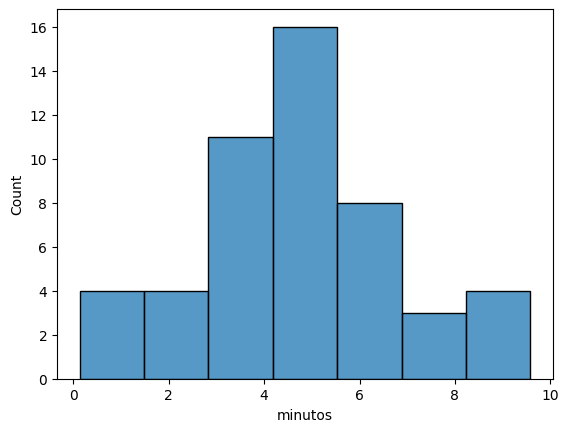

In [142]:
sns.histplot(x="minutos", data=df_montaje[df_montaje["metodo"] == "A"])

Para el método A, no ternemos una normal perfecta, por lo que aplicaremos Levene (con que una sea distinta debemos aplicar Levene).

In [155]:
def calcular_levene(df, columna_grupos, columna_metrica):
    unicos = df[columna_grupos].unique()

    for grupo in unicos:
        df_metrica = df[df[columna_grupos] == grupo][columna_metrica]
        globals()[grupo] = df_metrica
    
    print(stats.levene(*[globals()[var] for var in unicos]))

calcular_levene(df_montaje, "metodo", "minutos")

LeveneResult(statistic=np.float64(0.6377981201955287), pvalue=np.float64(0.5299107034782384))


Siendo el p-value mayor a 0,5, hay homoceidad.

<Axes: xlabel='metodo', ylabel='minutos'>

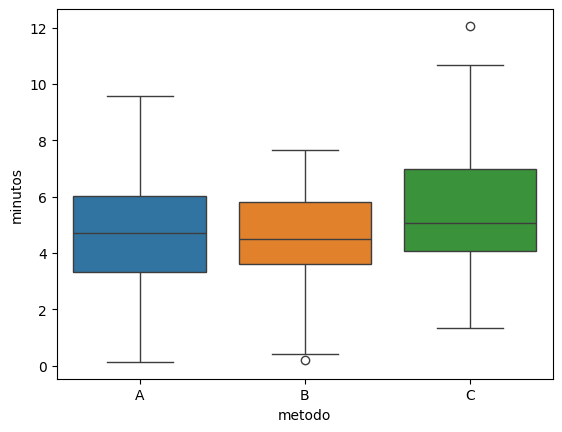

In [ ]:
sns.boxplot(df_montaje, x="metodo", y="minutos", hue="metodo")

### Test paramétrico

Los datos son independientes. Compararemos los métodos con Anova.

In [ ]:
def calcular_anova(df, columna_grupos, columna_metrica):
    unicos = df[columna_grupos].unique()

    for grupo in unicos:
        df_metrica = df[df[columna_grupos] == grupo][columna_metrica]
        globals()[grupo] = df_metrica
    
    print(stats.f_oneway(*[globals()[var] for var in unicos]))

calcular_anova(df_montaje, "metodo", "minutos")

F_onewayResult(statistic=np.float64(4.160769025074968), pvalue=np.float64(0.017470102171365413))


Interpretación: con un p valor <0,05, hay evidencia estadística suficiente para distinguir diferencias significativas en los métodos.

<Axes: xlabel='metodo', ylabel='minutos'>

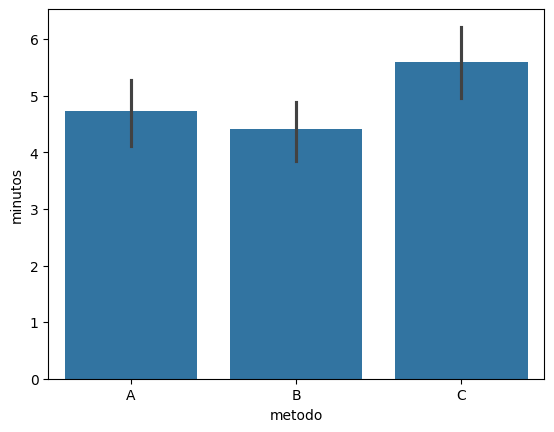

In [ ]:
sns.barplot(y="minutos", x="metodo", data=df_montaje)

## Método que ofrece los mejores resultados

Los métodos A y B ofrecen resultados similares, con medias de 4,7 y con 4,3 respectivamente. Por su parte, las medianas son 4,7 y 4,5 respectivamente.

#### Ejercicio 2: Densidad de Fluidos 


La convección es un mecanismo fundamental de transferencia de calor en fluidos, que ocurre debido a las variaciones en la densidad provocadas por diferencias de temperatura. Este fenómeno se manifiesta cuando las porciones del fluido que se calientan, al volverse menos densas, ascienden hacia regiones de menor temperatura, mientras que las porciones más frías, al ser más densas, descienden hacia las zonas donde la temperatura es más alta. Este movimiento continuo da lugar a las llamadas corrientes de convección, las cuales desempeñan un papel crucial en la distribución homogénea de la temperatura dentro del fluido, promoviendo un equilibrio térmico.

En este contexto, se ha diseñado y ejecutado un experimento con el propósito de investigar cómo se ve afectada la densidad de un fluido cuando se incrementa la temperatura en una región específica del sistema; por tanto se asegura la independencia y aleatoriedad del mismo. El objetivo del experimento es comprender en detalle las modificaciones en la densidad que resultan de este aumento térmico y cómo estas afectan el comportamiento global del fluido.


1. Analiza las suposiciones del modelo: ¿Se cumplen las condiciones de homocedasticidad, independencia y normalidad?
2. ¿Tiene la temperatura un impacto notable en la densidad del fluido?
3. ¿Es posible concluir que las temperaturas de 100 y 125 provocan, en promedio, una menor densidad en el fluido comparadas con las temperaturas de 150 y 175?

In [ ]:
df_densidad = pd.read_csv("datos/densidad_fluidos.csv")
df_densidad

,temperatura,densidad
0,100,21.790655
1,100,21.725900
2,100,21.806052
3,100,21.895319
4,100,21.716121
...,...,...
395,175,21.829916
396,175,21.670612
397,175,22.063380
398,175,21.875332


- Cambiaremos el tipo de dato de la columna temperatura de numérico a categórico, porque, a pesar de ser temperaturas, representan 4 tipos de categorías.

In [ ]:
df_densidad["temperatura"] = df_densidad["temperatura"].astype(str)

In [ ]:
df_densidad["temperatura"].unique()

array(['100', '125', '150', '175'], dtype=object)

In [ ]:
sa.exploracion_dataframe(df_densidad,"densidad")

El número de datos es 400 y el de columnas es 2

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
temperatura,object
densidad,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna TEMPERATURA tiene las siguientes valore únicos:


,count
temperatura,
100,100
125,100
150,100
175,100



 ..................... 



AttributeError: 'numpy.float64' object has no attribute 'upper'

In [ ]:
# No hay variables categóricas, por eso tenemos un error.

### Formular hipótesis
- H0: la densidad no cambia según la temperatura.
- H1: la densidad cambia según varía la temperatura.

### Asunciones: Normalidad

Usaremos kolmogrov por ser la muestra mayor de 30.

In [ ]:
df_medias_std2 = df_densidad.groupby('temperatura')['densidad'].agg(["mean", "std"]).reset_index() #agg agrupa varias funciones
df_medias_std2

,temperatura,mean,std
0,100,21.729410,0.092615
1,125,21.532402,0.102713
2,150,21.766618,0.110576
3,175,21.903682,0.113220


In [ ]:
# Kolmogorov test
np.random.seed(42)

def kolmogorov(df, grupo, columna):
    datos = df.groupby(grupo)[columna].agg(["mean", "std"])
    list_grupos = list(df[grupo].unique())

    for i in range(datos.shape[0]):
        dist = np.random.normal(loc=datos.iloc[i,0], scale = datos.iloc[i,1], size = df.shape[0])
        res = stats.kstest(df[df[grupo]==list_grupos[i]][columna], dist) #Quiero que me diga si es normal o no
        print(f"Kolmogorov grupo {list_grupos[i]} es {res}")

In [ ]:
kolmogorov(df_densidad, "temperatura", "densidad")

Kolmogorov grupo 100 es KstestResult(statistic=np.float64(0.0475), pvalue=np.float64(0.9916523423030328), statistic_location=np.float64(21.82235226299658), statistic_sign=np.int8(-1))
Kolmogorov grupo 125 es KstestResult(statistic=np.float64(0.07), pvalue=np.float64(0.8131232081337524), statistic_location=np.float64(21.545675010423196), statistic_sign=np.int8(-1))
Kolmogorov grupo 150 es KstestResult(statistic=np.float64(0.0975), pvalue=np.float64(0.41724457668774784), statistic_location=np.float64(21.87861989339484), statistic_sign=np.int8(1))
Kolmogorov grupo 175 es KstestResult(statistic=np.float64(0.0575), pvalue=np.float64(0.946417904256311), statistic_location=np.float64(21.81826182408329), statistic_sign=np.int8(1))


- Con p-valor >0,05 no podemos rechazar la hipótesis nula y por tanto nuestro datos son normales para las temperaturas 100, 125 y 175.

### Homocedasticidad

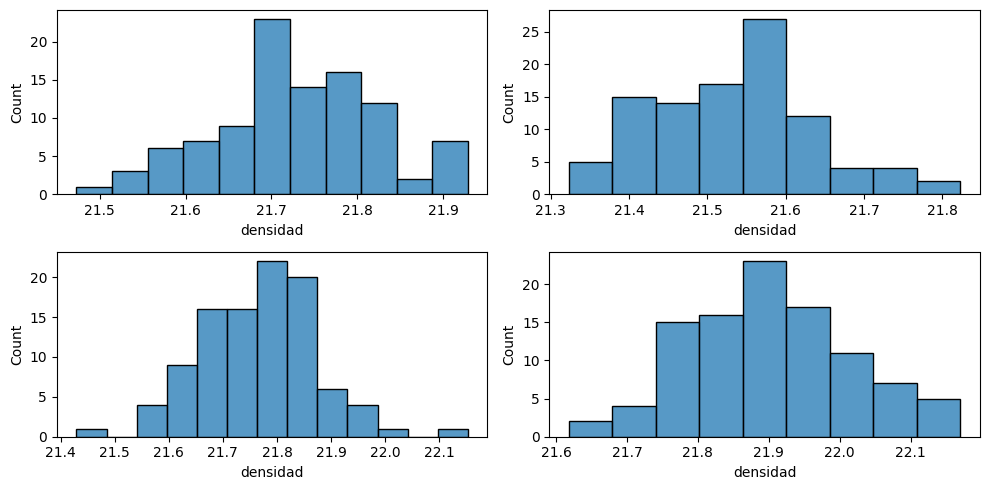

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,5))
axes= axes.flat

lista_temp = list(df_densidad["temperatura"].unique())

for indice, temp in enumerate(lista_temp):
    sns.histplot(df_densidad[df_densidad["temperatura"]==temp], x ="densidad", ax=axes[indice])

plt.tight_layout() 
plt.show()

Vemos que no tenemos distribuciones perfectas, calcularemos entonces Levene.

In [156]:
calcular_levene(df_densidad, "temperatura", "densidad")

LeveneResult(statistic=np.float64(1.3647908525254837), pvalue=np.float64(0.2531130263323115))


Con un p-value mayor a 0,05, se confirma la homoceidad.

### Test paramétrico

Los datos son independientes. Compararemos los métodos con Anova.

In [158]:
calcular_anova(df_densidad, "temperatura", "densidad")

F_onewayResult(statistic=np.float64(212.84277610615865), pvalue=np.float64(3.327798065118271e-82))


Siendo el p-value menor a 0,05, se acepta la hipótesis alternativa. Hay una diferencia significativa entre los grupos.

### Nuevas hipótesis
- H0: La temperatura no causa una diferencia en la densidad de los grupos.
- H1: La tempertatura causa una diferencia en la densidad de los grupos.

Haremos ahora una comparación entre las temperaturas de 100 y 125, y 150 y 175, para determinar si provocan densidades distintas.

In [ ]:
comp1 = pd.concat([df_densidad[df_densidad["temperatura"]=="100"], df_densidad[df_densidad["temperatura"]=="125"]])
comp2 = pd.concat([df_densidad[df_densidad["temperatura"]=="150"], df_densidad[df_densidad["temperatura"]=="175"]])
comp1["temperatura"] = "grupo 1"
comp2["temperatura"] = "grupo 2"
df_comparativo = pd.concat([comp1, comp2])
df_comparativo.rename(columns={"temperatura":"grupo"}, inplace=True)

<Axes: xlabel='grupo', ylabel='densidad'>

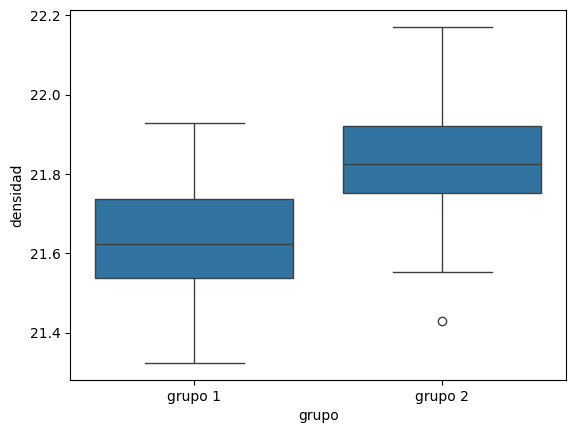

In [ ]:
sns.boxplot(df_comparativo, x="grupo", y="densidad")

### Normalidad

In [ ]:
kolmogorov(df_comparativo, "grupo", "densidad")

Kolmogorov grupo grupo 1 es KstestResult(statistic=np.float64(0.0875), pvalue=np.float64(0.25438687552104255), statistic_location=np.float64(21.5624776427124), statistic_sign=np.int8(1))
Kolmogorov grupo grupo 2 es KstestResult(statistic=np.float64(0.0425), pvalue=np.float64(0.9672282978991504), statistic_location=np.float64(21.95214582968895), statistic_sign=np.int8(-1))


Con los p-values >0,05, sabemos que tienen una distribución normal.

### Homoceidad

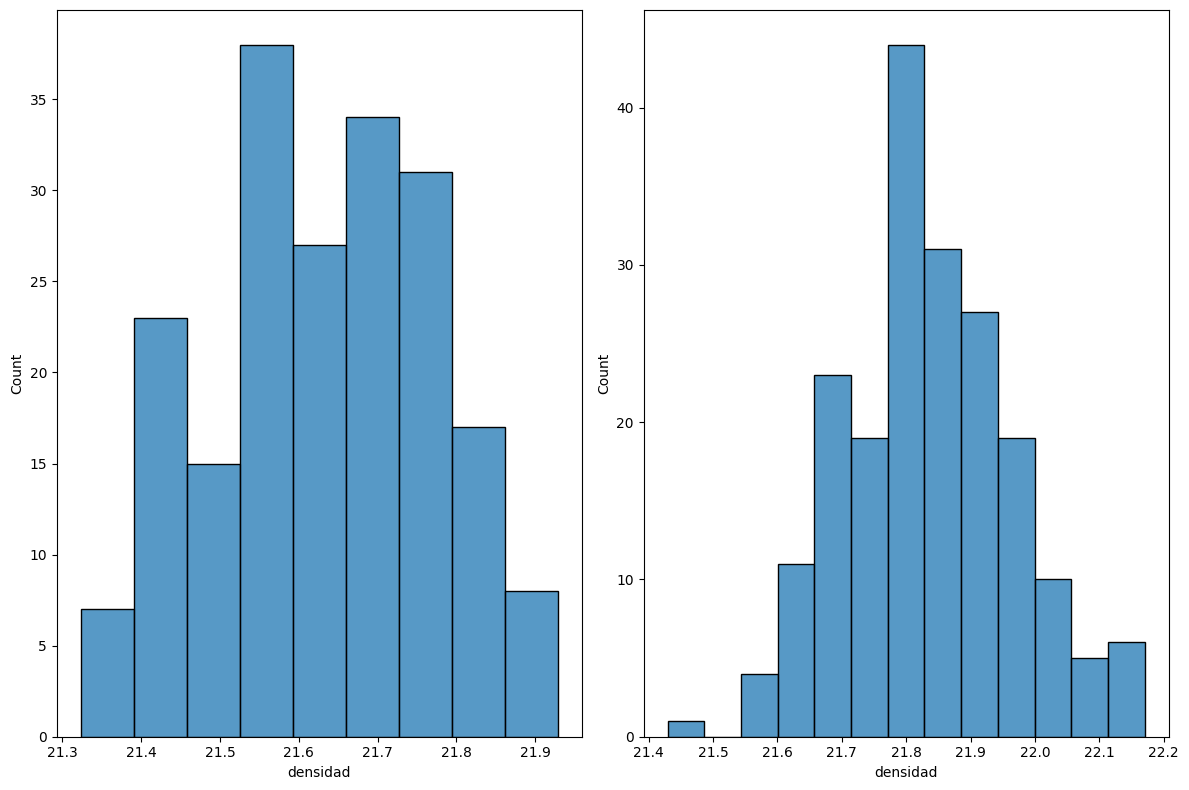

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))
axes= axes.flat

lista_temperaturas = list(df_comparativo["grupo"].unique())

for indice, temp in enumerate(lista_temperaturas):
    sns.histplot(df_comparativo[df_comparativo["grupo"] == temp], x ="densidad", ax=axes[indice])

plt.tight_layout()
plt.show()

Sin una distribución normal, calcularemos Levene.

In [149]:
df_comparativo

,grupo,densidad
0,grupo 1,21.790655
1,grupo 1,21.725900
2,grupo 1,21.806052
3,grupo 1,21.895319
4,grupo 1,21.716121
...,...,...
395,grupo 2,21.829916
396,grupo 2,21.670612
397,grupo 2,22.063380
398,grupo 2,21.875332


In [157]:
calcular_levene(df_comparativo, "grupo", "densidad")

LeveneResult(statistic=np.float64(3.2893801324531133), pvalue=np.float64(0.07048233198303848))


Con un p-value mayor a 0,05, confirmamos homoceidad. Considerando que los datos son independientes calcularemos Anova.

In [150]:
calcular_anova(df_densidad, "temperatura", "densidad")

F_onewayResult(statistic=np.float64(212.84277610615865), pvalue=np.float64(3.327798065118271e-82))


In [151]:
comp1.describe()

,densidad
count,200.000000
mean,21.630906
std,0.138807
min,21.323342
25%,21.537102
50%,21.622429
75%,21.736916
max,21.928896


In [152]:
comp2.describe()

,densidad
count,200.000000
mean,21.835150
std,0.131073
min,21.429454
25%,21.752522
50%,21.825754
75%,21.920089
max,22.170432


<Axes: xlabel='grupo', ylabel='densidad'>

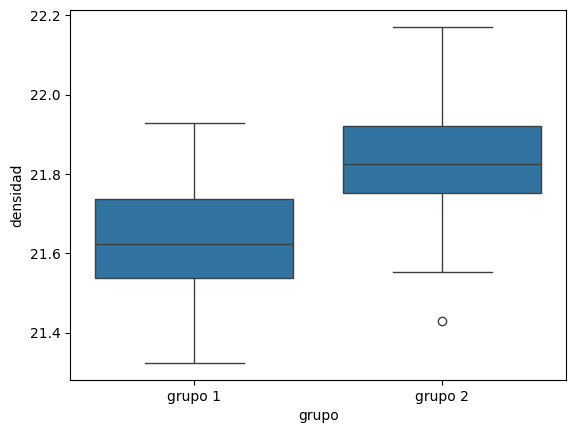

In [153]:
sns.boxplot(df_comparativo, x="grupo", y="densidad")

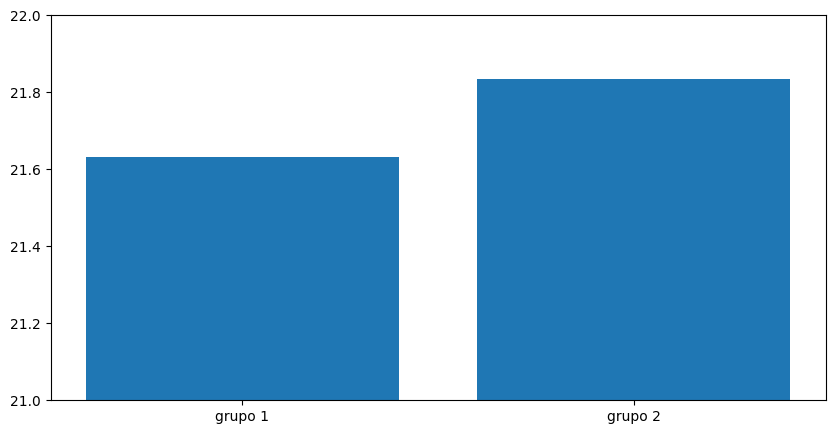

In [169]:
plt.figure(figsize=(10,5))
plt.bar(x = ["grupo 1", "grupo 2"], 
        height = [comp1["densidad"].mean(), comp2["densidad"].mean()])
plt.ylim(21,22)
plt.show()

Con un p-value menor a 0,05, hay suficiente evidencia estadística para no aceptar la hipótesis nula, existiendo una diferencia significativa entre las medias.